In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt



import pandas as pd


file = r'C:\Users\chaochaoyan\Documents\retrosynthesis\retrosim\retrosim\data\data_split.csv'

data = pd.read_csv(file) 


rxn = data['rxn_smiles'].tolist()



In [8]:
from copy import copy

from rdkit import Chem
from rdkit.Chem import rdChemReactions, rdDepictor, Draw
from rdkit.Chem.Draw import rdMolDraw2D, DrawingOptions


def get_tagged_atoms_from_mol(mol):
    '''Takes an RDKit molecule and returns list of tagged atoms and their
    corresponding numbers'''
    atoms = []
    atom_tags = []
    for atom in mol.GetAtoms():
        if atom.HasProp('molAtomMapNumber'):
            atoms.append(atom)
            atom_tags.append(str(atom.GetProp('molAtomMapNumber')))
    return atoms, atom_tags



for i, r in enumerate(rxn[:1000]):
    s, t = r.split('>>')
    mol = Chem.MolFromSmiles(t)
    if mol is None:
        print('None mol:', t)

    prod_atoms, prod_atom_tags = get_tagged_atoms_from_mol(mol)
    reactants = s.split('.')
    react_mols, react_smis = [mol], ['product']

    for j, reactant in enumerate(reactants):
        mol_react = Chem.MolFromSmiles(reactant)
        if mol_react is None:
            print('None mol:', reactant)
            continue

        react_mols.append(mol_react)
        react_smis.append('reactant_{}'.format(j))

    img = Draw.MolsToGridImage(
        react_mols,
        molsPerRow=len(react_mols),
        subImgSize=(300, 300),
        legends=react_smis
    )
    img.save('plots_rxn/rxn_{}_synthon.png'.format(i))
    


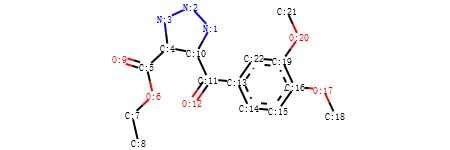

In [34]:
mol_new


In [40]:
print(Chem.MolToSmiles(mol_new))

COC(=O)[C@H](CCCC[NH])NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O


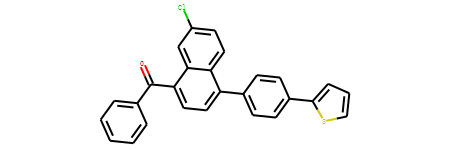

In [21]:
from rdkit import Chem


smi = 'O=C(c1ccc(-c2ccc(-c3cccs3)cc2)c2ccc(Cl)cc12)c1ccccc1'
mol = Chem.MolFromSmiles(smi)

mol

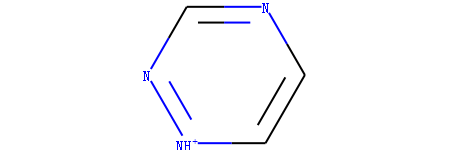

In [19]:

smi = 'C1=C[NH+]=NC=N1'
mol = Chem.MolFromSmiles(smi)

mol